<a href="https://colab.research.google.com/github/saraalbagory/ml-project/blob/main/alphabet_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Menna\.cache\kagglehub\datasets\sachinpatel21\az-handwritten-alphabets-in-csv-format\versions\5


In [3]:
import pandas as pd

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


The ord function returns the Unicode (ASCII) code point of a character.


In [4]:
import numpy as np

#get the last column
numericLabels =data.iloc[:,0].unique()

# for i in numericLabels:
#   print(f"Label: {chr(i + ord('A'))}")
# print(numericLabels)
# convert the number to labels
uniqueLabels = np.array([chr(i + ord('A')) for i in numericLabels])
print(uniqueLabels)
len=numericLabels.size
print(f"the number of classes: {len}")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
the number of classes: 26


show their distribution

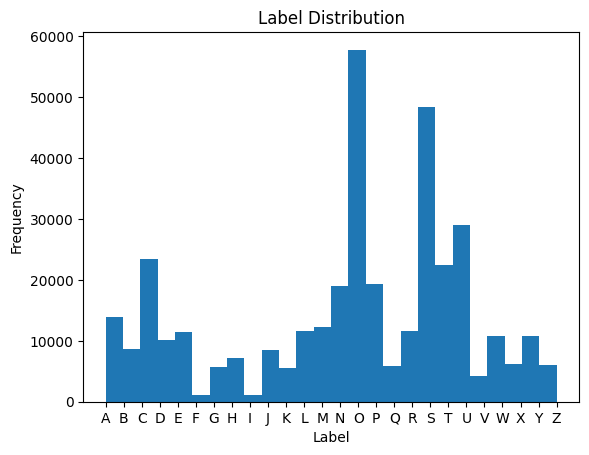

In [5]:
import matplotlib.pyplot as plt

numericLabels =data.iloc[:,0]
labels = np.array([chr(i + ord('A')) for i in numericLabels])
plt.hist(labels, bins=len)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


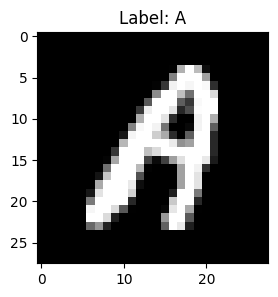

In [6]:
import matplotlib.pyplot as plt

data.info()
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

In [7]:
image_data=data.iloc[:,1:]
normalized_image_data=image_data/255
print(normalized_image_data)
normalized_image_data.describe()

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,3.724500e+05,3.724500e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000004,0.000004,0.000003,0.000002,0.000002,0.000003,9.370912e-07,4.211646e-08
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001925,0.002029,0.001652,0.001644,0.001512,0.001254,0.000819,0.001315,5.288302e-04,2.570312e-05
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.886275,0.898039,0.894118,0.921569,0.760784,0.403922,0.776471,3.215686e-01,1.568627e-02


In [8]:
# import tensorflow as tf
# normalized_features2=tf.keras.utils.normalize(features,axis=1)

Reshape the Flattened Vectors to Reconstruct and Display the Images

In [9]:
# reshaped_images = []
# for _, row in normalized_image_data.iterrows():  # Loop through each row
#     reshaped_image = row.values.reshape(28, 28)
#     reshaped_images.append(reshaped_image)
# reshaped_images = np.array(reshaped_images)
reshaped_images = normalized_image_data.values.reshape(-1, 28, 28)
# for i in range(10):
#   plt.figure(figsize=(1,1))
#   plt.imshow(reshaped_images[i], cmap='gray')
#   plt.title(f"label : {labels[i]}")
#   plt.show()

In [10]:
from sklearn.model_selection import train_test_split

numericLabels=data.iloc[:,0]
image_train, image_test, label_train, label_test=train_test_split(reshaped_images,numericLabels,test_size=0.2,random_state=42)
image_train_2d = image_train.reshape(image_train.shape[0], -1)
image_test_2d = image_test.reshape(image_test.shape[0], -1)

In [11]:
# from sklearn.svm import SVC

# model =SVC(C=1000,kernel='linear')
# model.fit(image_train_2d,label_train)

Split the training dataset into training and validation datasets

In [12]:
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.2, random_state=42)

In [13]:
from keras import utils as utils
#from tensorflow.keras.utils import to_categorical

label_train_onehot = utils.to_categorical(label_train, num_classes=26)
label_val_onehot = utils.to_categorical(label_val, num_classes=26)

reshape for cnn models

In [14]:
image_train_2d_tf = image_train.reshape(-1, 28, 28, 1)
image_val_2d_tf = image_val.reshape(-1, 28, 28, 1)
image_test_2d_tf = image_test.reshape(-1, 28, 28, 1)

MODEL 1

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

model1 = (keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
]))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history1 = model1.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=20,batch_size=512)

Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.7813 - loss: 0.7955 - val_accuracy: 0.9550 - val_loss: 0.1757
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9615 - loss: 0.1462 - val_accuracy: 0.9702 - val_loss: 0.1114
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9739 - loss: 0.0964 - val_accuracy: 0.9755 - val_loss: 0.0910
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9793 - loss: 0.0765 - val_accuracy: 0.9765 - val_loss: 0.0860
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9832 - loss: 0.0628 - val_accuracy: 0.9791 - val_loss: 0.0759
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9853 - loss: 0.0534 - val_accuracy: 0.9808 - val_loss: 0.0697
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9877 - loss: 0.0459 - val_accuracy: 0.9824 - val_loss: 0.0636
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9888 - loss: 0.0404 - 

In [17]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,088,080 (7.97 MB)

 Trainable params: 696,026 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,392,054 (5.31 MB)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


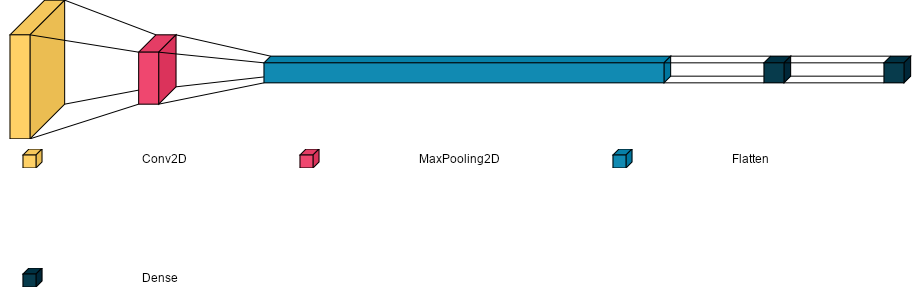

In [18]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model1, legend=True, font=font,spacing=100)

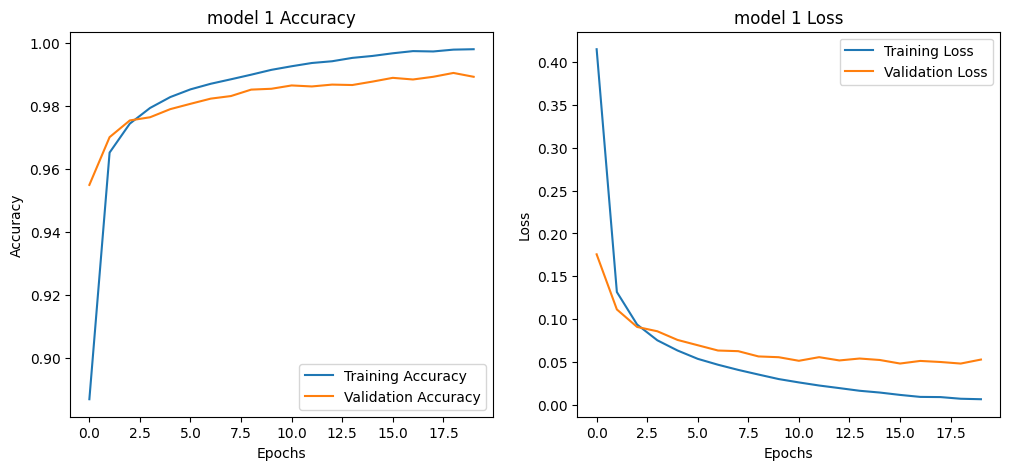

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2

In [20]:
keras.Sequential([])
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=20,batch_size=512)


c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step - accuracy: 0.6810 - loss: 1.1393 - val_accuracy: 0.9495 - val_loss: 0.1749
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.9543 - loss: 0.1576 - val_accuracy: 0.9628 - val_loss: 0.1302
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.9665 - loss: 0.1151 - val_accuracy: 0.9722 - val_loss: 0.0970
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 55s 118ms/step - accuracy: 0.9741 - loss: 0.0887 - val_accuracy: 0.9759 - val_loss: 0.0817
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.9789 - loss: 0.0735 - val_accuracy: 0.9756 - val_loss: 0.0804
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.9813 - loss: 0.0638 - val_accuracy: 0.9773 - val_loss: 0.0787
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.9830 - loss: 0.0571 - val_accuracy: 0.9816 - val_loss: 0.0647
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.9855 - loss: 0

In [21]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,136 (1.51 MB)

 Trainable params: 132,378 (517.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,758 (1.01 MB)

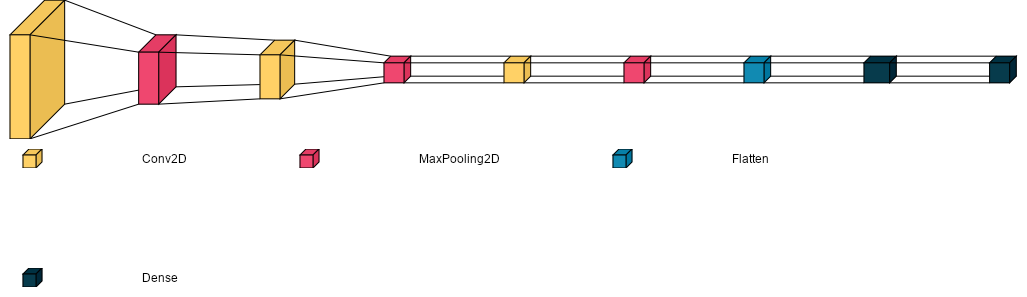

In [22]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model2, legend=True, font=font,spacing=100)

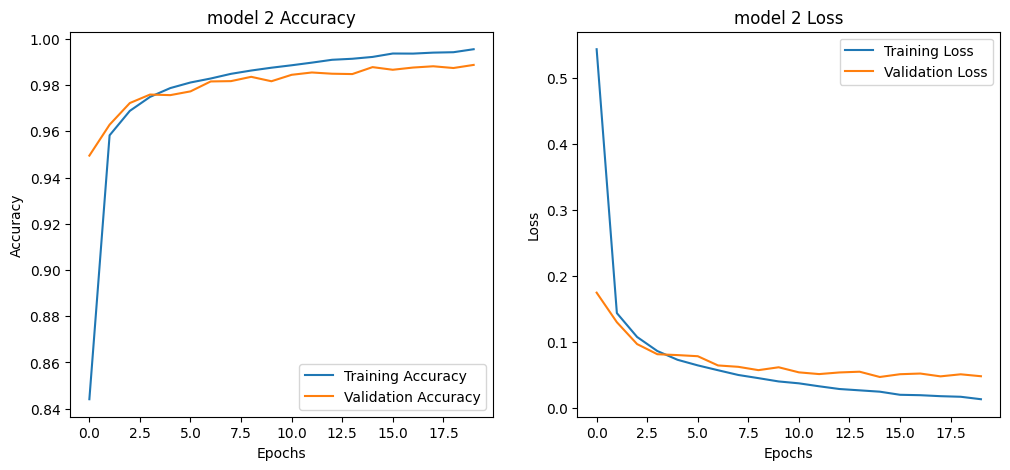

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

saving the best Model

In [24]:
model1.save('best_model.h5')

loading the model

In [25]:
best_model = tf.keras.models.load_model('best_model.h5')

reshape label_val

In [26]:
# label_val_2d_tf = label_val.reshape(-1, 28, 28, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [29]:
best_M_prediction = best_model.predict(image_val_2d_tf)


1863/1863 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [31]:
from PIL import Image

In [41]:
# Load and preprocess the image
image_path = 'D:/FOURTH_T1/ML/final project/WhatsApp Image 2024-12-16 at 4.25.16 PM (3).jpeg'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to model's input size
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape(-1, 28, 28, 1)  # Reshape for model input

In [44]:
# Make predictions
predictions =  best_model.predict(img_array)
predicted_letter_index = np.argmax(predictions)
predicted_letter = chr(65 + predicted_letter_index)  # Assuming A-Z mapping

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [45]:
print(f"Predicted letter: {predicted_letter}")

Predicted letter: A


In [28]:
print("Neural Network Confusion Matrix:\n", confusion_matrix(label_val, best_M_prediction))
print("Neural Network F1-Score:", f1_score(label_val, best_M_prediction, average='weighted'))

Neural Network Confusion Matrix:
 [[2293    0    1    0    1    0    0    0    0    0    1    5    1    1
     0    0    1   11    2    0    0    0    1    1    0    0]
 [   1 1358    1    1    2    0   12    0    0    1    1    0    0    0
     3    1    0    5    3    0    0    0    0    0    0    2]
 [   0    0 3775    0    5    0   12    0    0    2    0   19    0    0
     7    0    2    0    4    1    1    0    0    0    0    1]
 [   0    0    0 1564    0    0    2    0    0    8    0    0    0    0
    16    8    0    0    0    1    1    0    0    0    0    0]
 [   0    0    2    0 1832    0   11    0    0    1    0    3    0    0
     0    0    0    1    8    0    1    0    0    0    0    4]
 [   0    0    0    0    3  181    0    0    0    0    0    0    0    0
     0    1    0    0    0    2    0    0    0    0    0    0]
 [   0    1    1    0    2    0  884    0    0    0    0    0    0    0
     0    0    5    0    0    0    2    0    0    0    0    0]
 [  11    0    0    0